In [19]:
import tensorflow
from tensorflow import keras
from keras.layers import Input, Lambda,Dense,Flatten
from keras.models import Model
from keras.models import Sequential
from keras import preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [20]:
IMAGE_SIZE=[224,224]

In [21]:
train_path = r'C:\Users\mayan\Desktop\Data science projects\CNN\Dog Cat Github\Dataset\train'
valid_path = r'C:\Users\mayan\Desktop\Data science projects\CNN\Dog Cat Github\Dataset\test'

In [22]:
vgg = VGG16(input_shape= IMAGE_SIZE + [3], weights = 'imagenet', include_top=False)

In [23]:
for layer in vgg.layers:
    layer.trainable = False

In [24]:
folders = glob(r'C:\Users\mayan\Desktop\Data Science\Deep Learning\Convolutional Neural Network\Dog & Cat programs\DogCat DL Model VGG16\train\*')

In [25]:
folders

[]

In [26]:
X = Flatten()(vgg.output)

In [27]:
prediction = Dense(1,activation='sigmoid')(X)

In [28]:
model = Model(inputs=vgg.input,outputs=prediction)

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
training_set = train_datagen.flow_from_directory(train_path,target_size=(224,224),
                                                batch_size=32,
                                                class_mode='binary')

test_set = test_datagen.flow_from_directory(valid_path,target_size=(224,224),
                                           batch_size=32,
                                           class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [33]:
r = model.fit(training_set,
                        validation_data = test_set,
                        epochs=3)

Epoch 1/3
251/251 [==============================] - 2617s 10s/step - loss: 0.2957 - accuracy: 0.8702 - val_loss: 0.2081 - val_accuracy: 0.9155
Epoch 2/3
251/251 [==============================] - 8300s 33s/step - loss: 0.2073 - accuracy: 0.9133 - val_loss: 0.1978 - val_accuracy: 0.9204
Epoch 3/3
251/251 [==============================] - 1688s 7s/step - loss: 0.1821 - accuracy: 0.9250 - val_loss: 0.1935 - val_accuracy: 0.9239


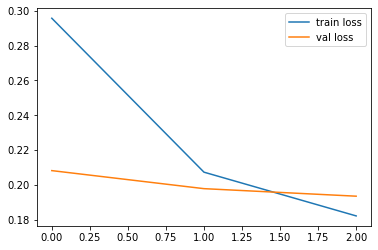

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('Lossval_loss')

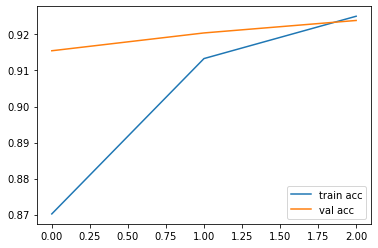

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('Accval_acc')

In [36]:
from keras.models import load_model

In [37]:
model.save('facefeatures_new_model.h5')

In [41]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\mayan\Desktop\Data science projects\CNN\Dog Cat Github\Dataset\val\dogs\dog.4048.jpg', target_size = (224, 224)) # location of image
test_image = image.img_to_array(test_image)    # converting to array
test_image = np.expand_dims(test_image, axis = 0)  # selecting dimension 1 and batch_size
result = model.predict(test_image)    
training_set.class_indices
if result[0][0] == 1:     # [0][0]  first zero is for batch and second zero is for singleimage.
  prediction = 'dog'
else:
  prediction = 'cat'

In [42]:
print(prediction)

dog
